Best Hyperparameters for Logistic Regression: {'C': 0.1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}
Best Hyperparameters for Random Forest: {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Logistic Regression - F1 Score: 0.9333333333333333, Accuracy: 0.9305555555555556
Random Forest - F1 Score: 0.918918918918919, Accuracy: 0.9166666666666666
Confusion Matrix for Logistic Regression:
[[32  4]
 [ 1 35]]
Confusion Matrix for Random Forest:
[[32  4]
 [ 2 34]]


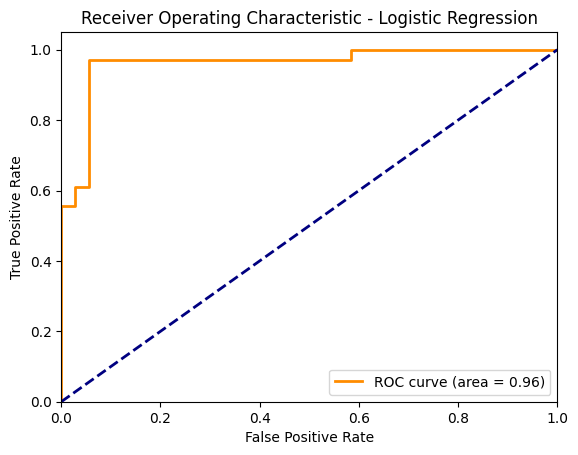

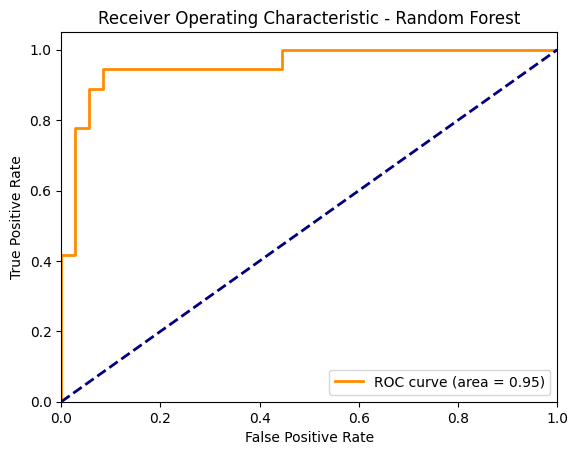

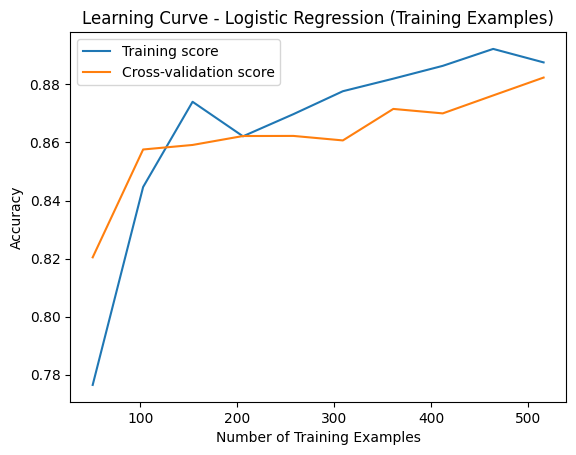

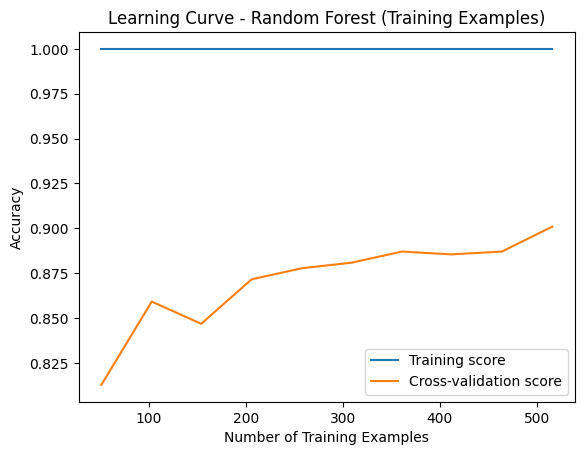

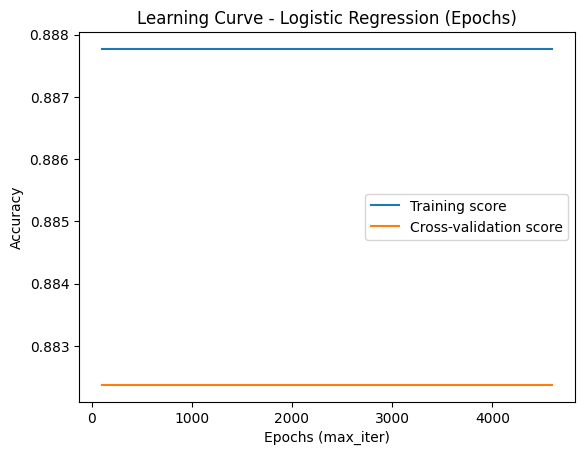

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, validation_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import warnings

# Suppress ConvergenceWarning
warnings.filterwarnings("ignore", category=UserWarning)

# Load the training and testing datasets
train_df = pd.read_csv('pcos_train.csv')
test_df = pd.read_csv('pcos_test.csv')

# Split the data into features and target variable
X_train = train_df.drop(columns=['PCOS_diagnosis'])
y_train = train_df['PCOS_diagnosis']
X_test = test_df.drop(columns=['PCOS_diagnosis'])
y_test = test_df['PCOS_diagnosis']

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the models and hyperparameters for tuning
log_reg = LogisticRegression(max_iter=5000, solver='sag')  # Increased max_iter and changed solver
rf_clf = RandomForestClassifier()

log_reg_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'sag', 'saga'],  # Removed 'newton-cg' as it doesn't support l2 penalty
    'penalty': ['l2'],
    'max_iter': [1000, 2000, 5000]  # Increased max_iter to avoid convergence issues
}

rf_params = {
    'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Perform hyperparameter tuning using GridSearchCV
log_reg_grid = GridSearchCV(log_reg, log_reg_params, cv=5, scoring='f1', error_score='raise')
rf_grid = GridSearchCV(rf_clf, rf_params, cv=5, scoring='f1', error_score='raise')

try:
    log_reg_grid.fit(X_train_scaled, y_train)
except Exception as e:
    print(f"Error during Logistic Regression GridSearchCV: {e}")

try:
    rf_grid.fit(X_train_scaled, y_train)
except Exception as e:
    print(f"Error during Random Forest GridSearchCV: {e}")

# Get the best models and hyperparameters if no errors occurred
if log_reg_grid.best_estimator_:
    best_log_reg = log_reg_grid.best_estimator_
    best_log_reg_params = log_reg_grid.best_params_
    print(f"Best Hyperparameters for Logistic Regression: {best_log_reg_params}")

if rf_grid.best_estimator_:
    best_rf_clf = rf_grid.best_estimator_
    best_rf_clf_params = rf_grid.best_params_
    print(f"Best Hyperparameters for Random Forest: {best_rf_clf_params}")

# Evaluate the models on the test set if no errors occurred
if log_reg_grid.best_estimator_ and rf_grid.best_estimator_:
    y_pred_log_reg = best_log_reg.predict(X_test_scaled)
    y_pred_rf_clf = best_rf_clf.predict(X_test_scaled)

    log_reg_f1 = f1_score(y_test, y_pred_log_reg)
    rf_clf_f1 = f1_score(y_test, y_pred_rf_clf)

    log_reg_acc = accuracy_score(y_test, y_pred_log_reg)
    rf_clf_acc = accuracy_score(y_test, y_pred_rf_clf)

    print(f"Logistic Regression - F1 Score: {log_reg_f1}, Accuracy: {log_reg_acc}")
    print(f"Random Forest - F1 Score: {rf_clf_f1}, Accuracy: {rf_clf_acc}")

    # Confusion Matrix for Logistic Regression
    conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
    print("Confusion Matrix for Logistic Regression:")
    print(conf_matrix_log_reg)

    # Confusion Matrix for Random Forest
    conf_matrix_rf_clf = confusion_matrix(y_test, y_pred_rf_clf)
    print("Confusion Matrix for Random Forest:")
    print(conf_matrix_rf_clf)

    # ROC Curve for Logistic Regression
    fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, best_log_reg.predict_proba(X_test_scaled)[:, 1])
    roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)

    plt.figure()
    plt.plot(fpr_log_reg, tpr_log_reg, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_log_reg:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic - Logistic Regression')
    plt.legend(loc="lower right")
    plt.show()

    # ROC Curve for Random Forest
    fpr_rf_clf, tpr_rf_clf, _ = roc_curve(y_test, best_rf_clf.predict_proba(X_test_scaled)[:, 1])
    roc_auc_rf_clf = auc(fpr_rf_clf, tpr_rf_clf)

    plt.figure()
    plt.plot(fpr_rf_clf, tpr_rf_clf, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_rf_clf:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic - Random Forest')
    plt.legend(loc="lower right")
    plt.show()

    # Learning Curve with Number of Training Examples as X-axis
    train_sizes_log_reg, train_scores_log_reg, test_scores_log_reg = learning_curve(
        best_log_reg, X_train_scaled, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
    )
    train_scores_mean_log_reg = train_scores_log_reg.mean(axis=1)
    test_scores_mean_log_reg = test_scores_log_reg.mean(axis=1)

    plt.figure()
    plt.plot(train_sizes_log_reg, train_scores_mean_log_reg, label='Training score')
    plt.plot(train_sizes_log_reg, test_scores_mean_log_reg, label='Cross-validation score')
    plt.title('Learning Curve - Logistic Regression (Training Examples)')
    plt.xlabel('Number of Training Examples')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    train_sizes_rf_clf, train_scores_rf_clf, test_scores_rf_clf = learning_curve(
        best_rf_clf, X_train_scaled, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
    )
    train_scores_mean_rf_clf = train_scores_rf_clf.mean(axis=1)
    test_scores_mean_rf_clf = test_scores_rf_clf.mean(axis=1)

    plt.figure()
    plt.plot(train_sizes_rf_clf, train_scores_mean_rf_clf, label='Training score')
    plt.plot(train_sizes_rf_clf, test_scores_mean_rf_clf, label='Cross-validation score')
    plt.title('Learning Curve - Random Forest (Training Examples)')
    plt.xlabel('Number of Training Examples')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Learning Curve with Epochs as X-axis (for Logistic Regression only)
    param_range = np.arange(100, 5000, 500)  # Define the range of epochs
    train_scores_log_reg, test_scores_log_reg = validation_curve(
        best_log_reg, X_train_scaled, y_train, param_name="max_iter", param_range=param_range, cv=5, scoring="accuracy"
    )
    train_scores_mean_log_reg = train_scores_log_reg.mean(axis=1)
    test_scores_mean_log_reg = test_scores_log_reg.mean(axis=1)

    plt.figure()
    plt.plot(param_range, train_scores_mean_log_reg, label='Training score')
    plt.plot(param_range, test_scores_mean_log_reg, label='Cross-validation score')
    plt.title('Learning Curve - Logistic Regression (Epochs)')
    plt.xlabel('Epochs (max_iter)')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# PCOS perdiction using Logistic Regression & Random Forest models (Feature engineering - BMI, 1000 synthetic data for training)

## Dataset
- Train model using POCS2023 dataset: https://www.kaggle.com/datasets/sahilkoli04/pcos2023/data

## Data Perprocessing
- Feature engineering: Added feature BMI which is calculated from 'Height' & 'Weight'.
- Features selection: Removed features 'Height' & 'Weight' as they are highly correlated to BMI.
- [Data Perprocessing]

## Best Hyperparameters:
- Logistic Regression: {'C': 0.1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}
- Random Forest: {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}

## Model Performance:
### Logistic Regression:
- F1 Score: 0.9333
- Accuracy: 0.9306

### Random Forest:
- F1 Score: 0.9189
- Accuracy: 0.9167

## Confusion Matrices:
### Logistic Regression:
        [[32  4]
         [ 1 35]]
- True Positives (TP): 35
- True Negatives (TN): 32
- False Positives (FP): 4
- False Negatives (FN): 1

### Random Forest:
        [[32  4]
         [ 2 34]]
- True Positives (TP): 34
- True Negatives (TN): 32
- False Positives (FP): 4
- False Negatives (FN): 2

## ROC Curves:
### Logistic Regression:
- AUC (Area Under Curve): 0.96

### Random Forest:
- AUC (Area Under Curve): 0.95

## Analysis of Results
### Model Performance:
- Both models perform very well, with Logistic Regression slightly outperforming Random Forest in terms of F1 score and accuracy.
- The F1 score (harmonic mean of precision and recall) is high for both models, indicating a good balance between precision and recall.
- The accuracy is also high, with Logistic Regression achieving 93.06% and Random Forest achieving 91.67%.

### Confusion Matrix:
- Both models have a low number of false positives (FP) and false negatives (FN), which is desirable for a medical diagnosis task.
- Logistic Regression has slightly fewer false negatives (1 vs. 2), which is critical in medical diagnosis as it reduces the risk of missing positive cases.

### ROC Curves:
- The AUC values for both models are very high (0.96 for Logistic Regression and 0.95 for Random Forest), indicating excellent ability to distinguish between positive and negative cases.
- The ROC curves are close to the top-left corner, which is ideal for a classifier.

## Analysis of Plotted Graphs
### ROC Curves:
#### Logistic Regression:
- The ROC curve is smooth and reaches a high true positive rate (TPR) with a low false positive rate (FPR).
- The AUC of 0.96 indicates excellent performance.

#### Random Forest:
- The ROC curve is also smooth and performs similarly to Logistic Regression, with an AUC of 0.95.

## Conclusion: Both models are highly effective at distinguishing between PCOS and non-PCOS cases.
### Learning Curves (Training Examples):
#### Logistic Regression:
- The training score and cross-validation score converge as the number of training examples increases, indicating that the model generalizes well.
- The gap between the training and cross-validation scores is small, suggesting low overfitting.

#### Random Forest:
- The training score is very high, but the cross-validation score is slightly lower, indicating a small amount of overfitting.
- However, the cross-validation score is still high, showing good generalization.

### Conclusion: Both models benefit from more training data, but Logistic Regression generalizes slightly better.
#### Learning Curve (Epochs for Logistic Regression):
- The learning curve shows the model's performance as the number of epochs (iterations) increases.
- The training score and cross-validation score are very close, indicating that the model is well-tuned and not overfitting.
- The accuracy stabilizes after a certain number of epochs, suggesting that increasing max_iter beyond 1000 may not significantly improve performance.

### Conclusion: The model converges well, and the chosen max_iter value is appropriate.

## Conclusion
- Logistic Regression performs slightly better than Random Forest for this PCOS diagnosis task, achieving higher F1 score, accuracy, and AUC.
- Both models are highly effective, with low false positives and false negatives, making them suitable for medical diagnosis.
- The learning curves indicate that both models generalize well, with Logistic Regression showing slightly better generalization.
- The ROC curves confirm that both models are excellent at distinguishing between positive and negative cases.

## Recommendations
- Logistic Regression is recommended for this task due to its slightly better performance and lower computational cost compared to Random Forest.
- If interpretability is important, Random Forest can still be used, as it provides feature importance, which can help in understanding the factors contributing to PCOS diagnosis.

Best Hyperparameters for Logistic Regression: {'C': 0.01, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Hyperparameters for Random Forest: {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Logistic Regression - F1 Score: 0.45569620253164556, Accuracy: 0.4027777777777778
Random Forest - F1 Score: 0.4722222222222222, Accuracy: 0.4722222222222222
Confusion Matrix for Logistic Regression:
[[11 25]
 [18 18]]
Confusion Matrix for Random Forest:
[[17 19]
 [19 17]]


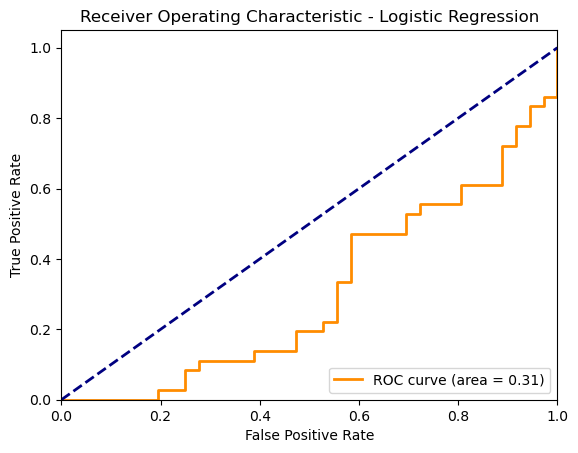

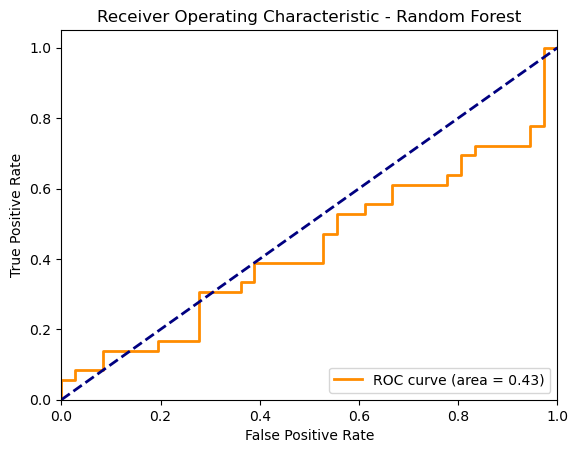

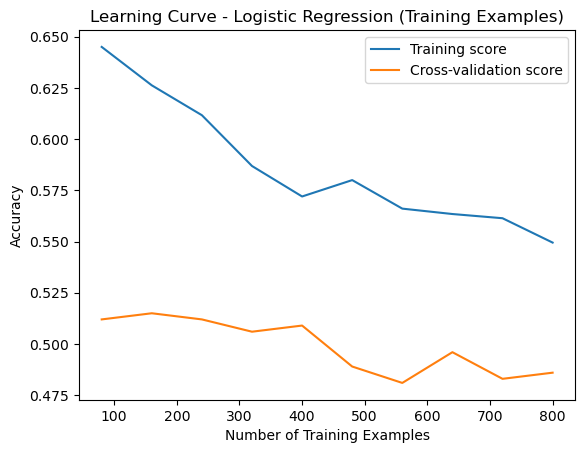

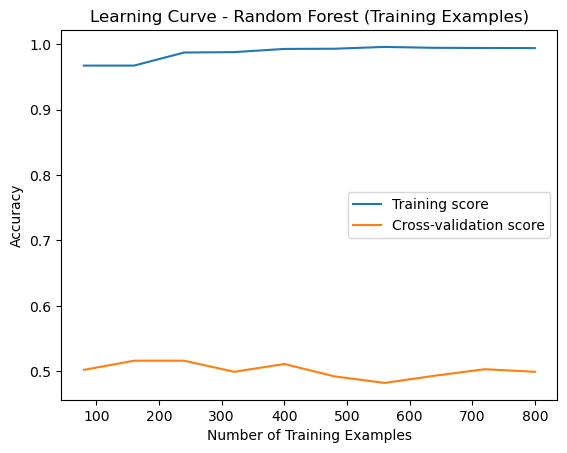

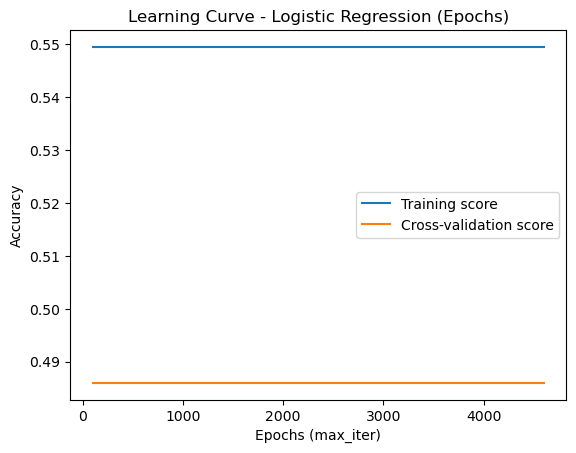

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, validation_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import warnings

# Suppress ConvergenceWarning
warnings.filterwarnings("ignore", category=UserWarning)

# Load the training and testing datasets
train_df = pd.read_csv('synthetic_pcos_dataset2.csv')
test_df = pd.read_csv('pcos_test.csv')

# Split the data into features and target variable
X_train = train_df.drop(columns=['PCOS_diagnosis'])
y_train = train_df['PCOS_diagnosis']
X_test = test_df.drop(columns=['PCOS_diagnosis'])
y_test = test_df['PCOS_diagnosis']

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the models and hyperparameters for tuning
log_reg = LogisticRegression(max_iter=5000, solver='sag')  # Increased max_iter and changed solver
rf_clf = RandomForestClassifier()

log_reg_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'sag', 'saga'],  # Removed 'newton-cg' as it doesn't support l2 penalty
    'penalty': ['l2'],
    'max_iter': [1000, 2000, 5000]  # Increased max_iter to avoid convergence issues
}

rf_params = {
    'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Perform hyperparameter tuning using GridSearchCV
log_reg_grid = GridSearchCV(log_reg, log_reg_params, cv=5, scoring='f1', error_score='raise')
rf_grid = GridSearchCV(rf_clf, rf_params, cv=5, scoring='f1', error_score='raise')

try:
    log_reg_grid.fit(X_train_scaled, y_train)
except Exception as e:
    print(f"Error during Logistic Regression GridSearchCV: {e}")

try:
    rf_grid.fit(X_train_scaled, y_train)
except Exception as e:
    print(f"Error during Random Forest GridSearchCV: {e}")

# Get the best models and hyperparameters if no errors occurred
if log_reg_grid.best_estimator_:
    best_log_reg = log_reg_grid.best_estimator_
    best_log_reg_params = log_reg_grid.best_params_
    print(f"Best Hyperparameters for Logistic Regression: {best_log_reg_params}")

if rf_grid.best_estimator_:
    best_rf_clf = rf_grid.best_estimator_
    best_rf_clf_params = rf_grid.best_params_
    print(f"Best Hyperparameters for Random Forest: {best_rf_clf_params}")

# Evaluate the models on the test set if no errors occurred
if log_reg_grid.best_estimator_ and rf_grid.best_estimator_:
    y_pred_log_reg = best_log_reg.predict(X_test_scaled)
    y_pred_rf_clf = best_rf_clf.predict(X_test_scaled)

    log_reg_f1 = f1_score(y_test, y_pred_log_reg)
    rf_clf_f1 = f1_score(y_test, y_pred_rf_clf)

    log_reg_acc = accuracy_score(y_test, y_pred_log_reg)
    rf_clf_acc = accuracy_score(y_test, y_pred_rf_clf)

    print(f"Logistic Regression - F1 Score: {log_reg_f1}, Accuracy: {log_reg_acc}")
    print(f"Random Forest - F1 Score: {rf_clf_f1}, Accuracy: {rf_clf_acc}")

    # Confusion Matrix for Logistic Regression
    conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
    print("Confusion Matrix for Logistic Regression:")
    print(conf_matrix_log_reg)

    # Confusion Matrix for Random Forest
    conf_matrix_rf_clf = confusion_matrix(y_test, y_pred_rf_clf)
    print("Confusion Matrix for Random Forest:")
    print(conf_matrix_rf_clf)

    # ROC Curve for Logistic Regression
    fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, best_log_reg.predict_proba(X_test_scaled)[:, 1])
    roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)

    plt.figure()
    plt.plot(fpr_log_reg, tpr_log_reg, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_log_reg:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic - Logistic Regression')
    plt.legend(loc="lower right")
    plt.show()

    # ROC Curve for Random Forest
    fpr_rf_clf, tpr_rf_clf, _ = roc_curve(y_test, best_rf_clf.predict_proba(X_test_scaled)[:, 1])
    roc_auc_rf_clf = auc(fpr_rf_clf, tpr_rf_clf)

    plt.figure()
    plt.plot(fpr_rf_clf, tpr_rf_clf, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_rf_clf:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic - Random Forest')
    plt.legend(loc="lower right")
    plt.show()

    # Learning Curve with Number of Training Examples as X-axis
    train_sizes_log_reg, train_scores_log_reg, test_scores_log_reg = learning_curve(
        best_log_reg, X_train_scaled, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
    )
    train_scores_mean_log_reg = train_scores_log_reg.mean(axis=1)
    test_scores_mean_log_reg = test_scores_log_reg.mean(axis=1)

    plt.figure()
    plt.plot(train_sizes_log_reg, train_scores_mean_log_reg, label='Training score')
    plt.plot(train_sizes_log_reg, test_scores_mean_log_reg, label='Cross-validation score')
    plt.title('Learning Curve - Logistic Regression (Training Examples)')
    plt.xlabel('Number of Training Examples')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    train_sizes_rf_clf, train_scores_rf_clf, test_scores_rf_clf = learning_curve(
        best_rf_clf, X_train_scaled, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
    )
    train_scores_mean_rf_clf = train_scores_rf_clf.mean(axis=1)
    test_scores_mean_rf_clf = test_scores_rf_clf.mean(axis=1)

    plt.figure()
    plt.plot(train_sizes_rf_clf, train_scores_mean_rf_clf, label='Training score')
    plt.plot(train_sizes_rf_clf, test_scores_mean_rf_clf, label='Cross-validation score')
    plt.title('Learning Curve - Random Forest (Training Examples)')
    plt.xlabel('Number of Training Examples')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Learning Curve with Epochs as X-axis (for Logistic Regression only)
    param_range = np.arange(100, 5000, 500)  # Define the range of epochs
    train_scores_log_reg, test_scores_log_reg = validation_curve(
        best_log_reg, X_train_scaled, y_train, param_name="max_iter", param_range=param_range, cv=5, scoring="accuracy"
    )
    train_scores_mean_log_reg = train_scores_log_reg.mean(axis=1)
    test_scores_mean_log_reg = test_scores_log_reg.mean(axis=1)

    plt.figure()
    plt.plot(param_range, train_scores_mean_log_reg, label='Training score')
    plt.plot(param_range, test_scores_mean_log_reg, label='Cross-validation score')
    plt.title('Learning Curve - Logistic Regression (Epochs)')
    plt.xlabel('Epochs (max_iter)')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

## Model Performance (F1 Score and Accuracy)
### Original Dataset (646 samples):
#### Logistic Regression:
- F1 Score: 0.9333
- Accuracy: 0.9306

#### Random Forest:
- F1 Score: 0.9189
- Accuracy: 0.9167

### Synthetic Dataset (1000 samples):
#### Logistic Regression:
- F1 Score: 0.4557
- Accuracy: 0.4028

#### Random Forest:
- F1 Score: 0.4722
- Accuracy: 0.4722

### Analysis:
- The models trained on the original dataset perform significantly better than those trained on the synthetic dataset. The F1 scores and accuracy for both Logistic Regression and Random Forest are much higher for the original dataset.
- The synthetic dataset seems to have introduced noise or bias, leading to poor model performance. The F1 scores and accuracy are close to random guessing (0.5), indicating that the models are not learning effectively from the synthetic data.

## Confusion Matrix
### Original Dataset (646 samples):
#### Logistic Regression:
- True Positives (TP): 35
- True Negatives (TN): 32
- False Positives (FP): 4
- False Negatives (FN): 1

#### Random Forest:
- True Positives (TP): 34
- True Negatives (TN): 32
- False Positives (FP): 4
- False Negatives (FN): 2

### Synthetic Dataset (1000 samples):
#### Logistic Regression:
- True Positives (TP): 18
- True Negatives (TN): 11
- False Positives (FP): 25
- False Negatives (FN): 18

#### Random Forest:
- True Positives (TP): 17
- True Negatives (TN): 17
- False Positives (FP): 19
- False Negatives (FN): 19

### Analysis:
- The confusion matrices for the original dataset show that both models have a low number of false positives and false negatives, which is ideal for a medical diagnosis task.
- In contrast, the models trained on the synthetic dataset have a high number of false positives and false negatives, indicating poor classification performance. This further confirms that the synthetic data is not providing the models with meaningful patterns to learn from.

## ROC Curves and AUC
### Original Dataset (646 samples):
#### Logistic Regression:
- AUC: 0.96

#### Random Forest:
- AUC: 0.95

### Synthetic Dataset (1000 samples):
#### Logistic Regression:
- AUC: 0.31

#### Random Forest:
- AUC: 0.43

### Analysis:
- The ROC curves for the original dataset are close to the top-left corner, with high AUC values, indicating excellent performance in distinguishing between positive and negative cases.
- For the synthetic dataset, the ROC curves are much closer to the diagonal line (random guessing), with very low AUC values. This suggests that the models are not able to effectively distinguish between the classes when trained on synthetic data.

## Learning Curves
### Original Dataset (646 samples):
#### Logistic Regression:
- The training and cross-validation scores converge as the number of training examples increases, indicating good generalization.

#### Random Forest:
- The training score is high, but the cross-validation score is slightly lower, indicating some overfitting. However, the cross-validation score is still high, showing good generalization.

### Synthetic Dataset (1000 samples):
#### Logistic Regression:
- The training and cross-validation scores are low and do not improve significantly with more training examples, indicating poor learning.

#### Random Forest:
- Similar to Logistic Regression, the training and cross-validation scores are low, indicating that the model is not learning effectively from the synthetic data.

### Analysis:
- The learning curves for the original dataset show that both models benefit from more training data and generalize well.
- For the synthetic dataset, the learning curves indicate that the models are not improving with more data, suggesting that the synthetic data does not provide useful information for learning.

## Conclusion and Recommendations
### Original Dataset:
- Both Logistic Regression and Random Forest perform very well on the original dataset, with Logistic Regression slightly outperforming Random Forest in terms of F1 score, accuracy, and AUC.
- The models generalize well, and the learning curves show that they benefit from more training data.

### Synthetic Dataset:
- The models trained on the synthetic dataset perform poorly, with low F1 scores, accuracy, and AUC values. The confusion matrices and ROC curves indicate that the models are not able to effectively distinguish between the classes.
- The learning curves suggest that the synthetic data does not provide meaningful patterns for the models to learn from.

## Recommendations:
- Use the Original Dataset: The original dataset with 646 samples provides much better model performance. Synthetic data, in this case, does not seem to be a good substitute.
- Improve Synthetic Data Generation: If synthetic data must be used, consider improving the data generation process to better mimic the patterns in the original dataset. The current synthetic data appears to introduce noise or bias, leading to poor model performance.